ランダムウォークモデルの Kalman Smoother 推定

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set parameters
N = 60
q = 1
r = np.sqrt(10)
x0 = 0

In [3]:
def evolve(x):
    return x + np.random.normal(0,q)

def observe(x):
    return x + np.random.normal(0,r)

In [4]:
# 観測データ作成
x = np.zeros(N)
y = np.zeros(N)
x[0] = 0.1
for i in range(1,N):
    x[i] = x[i-1] + np.random.normal(0,q)
    y[i] = x[i] + np.random.normal(0,r)

xp = np.zeros(N) # 一時刻先予測
Pp = np.zeros(N) # 一時刻先分散
xp[0] = 0
Pp[0] = 2
xu = np.copy(xp) # フィルタ予測
Pu = np.copy(Pp) # フィルタ分散

for i in range(1,N):
    xp[i] = xu[i-1]
    Pp[i] = Pu[i-1] + q
    K = Pp[i]/(Pp[i]+r)
    xu[i] = xp[i] + K*(y[i]-xp[i])
    Pu[i] = (r*Pp[i])/(Pp[i]+r)

Text(0.5, 0, 'Number of steps t')

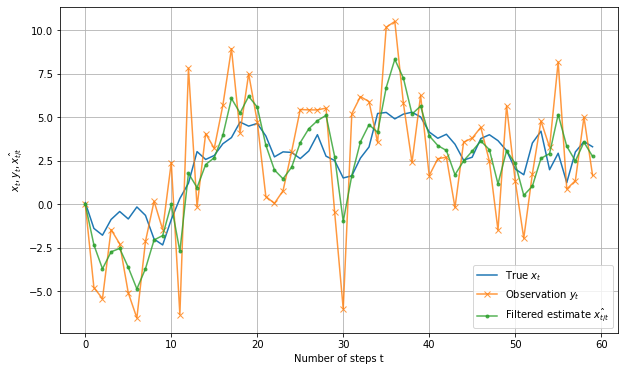

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x, label="True $x_t$")
plt.plot(y, marker="x", alpha=0.8, label="Observation $y_t$")
plt.plot(xu, marker=".", alpha=0.8, label="Filtered estimate $\hat{x_{t/t}}$")
plt.grid()
plt.legend()
plt.ylabel("$x_t,y_t,\hat{x_{t/t}}$")
plt.xlabel("Number of steps t")

In [6]:
xs = np.zeros(N)
Ps = np.zeros(N)
xs[-1] = xu[-1]
Ps[-1] = Pu[-1]

for i in reversed(range(N-1)):
    C = Pu[i]/(Pu[i]+q)
    P = Pu[i] + pow(C,2)*(Ps[i+1]-Pp[i+1])
    xs[i] = xu[i] + C*(xs[i+1]-xp[i+1])

Text(0.5, 0, 'Number of steps t')

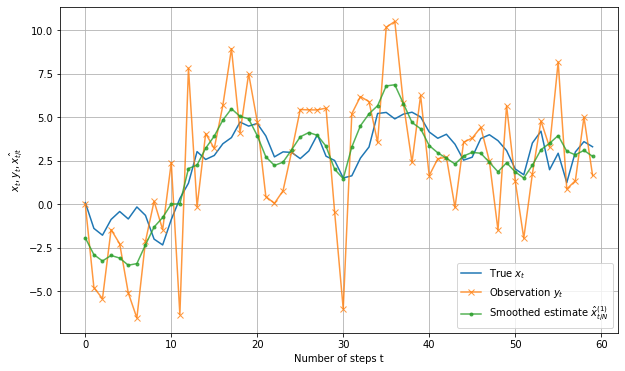

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x, label="True $x_t$")
plt.plot(y, marker="x", alpha=0.8, label="Observation $y_t$")
plt.plot(xs, marker=".", alpha=0.8, label="Smoothed estimate $\hat{x}_{t/N}^{(1)}$")
plt.grid()
plt.legend()
plt.ylabel("$x_t,y_t,\hat{x_{t/t}}$")
plt.xlabel("Number of steps t")